<a href="https://colab.research.google.com/github/AguaClara/ram_pump/blob/master/Fall%202019/data_analysis_colab/flow_analysis_total_now23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install aguaclara

In [0]:
import aguaclara.research.procoda_parser as pp
import matplotlib.pyplot as plt
import numpy as np
import aguaclara.core.constants as c
import aguaclara.core.physchem as pc
import pandas as pd
from aguaclara.research.peristaltic_pump import vol_per_rev_LS
from aguaclara.core.units import unit_registry as u
from scipy import integrate
from aguaclara.research.peristaltic_pump import flow_rate
from aguaclara.core.units import u
import aguaclara as ac
from scipy import integrate

In [0]:
nov23 = 'https://raw.githubusercontent.com/AguaClara/ram_pump/master/Fall%202019/datalog/nov23%231collection.tsv'
note = pp.notes(nov23)
first_row = np.array([]);
first_row = note.iloc[:,0].index.tolist()
start = np.array([])
end = np.array([])
num_turn = 2; #starting number of turns
turn = np.array([])
for i in range(0,len(first_row)-1,2):
  start = np.append(start,first_row[i])
  if (num_turn ==4):
    end = np.append(end,46700)
  else:
    end = np.append(end,first_row[i+1])
  turn = np.append(turn,num_turn)
  num_turn = num_turn+1
a = np.empty(11);
a.fill(100);
b = np.empty(11);
b.fill
start = np.add(start,a)
end = np.subtract(end,a)
#turns = np.array([2 3 4 5 6 7 8 9 10 11 12]);
#start = [4150 22186 45602 96736 118334 146769 168957 194566 214567 236582 258673]; #starting index
#end = [16948 35441 90794 113312 142508 164444 189290 211245 232562 254020 267410]; #ending index
start = np.array(start, dtype='int')
end = np.array(end, dtype='int')
print(start)
print(end)


[  4250  22286  45702  96836 118434 146869 169057 194666 214667 236682
 258773]
[ 16848  35341  46600 113212 142408 164344 189190 211145 232462 253920
 267310]


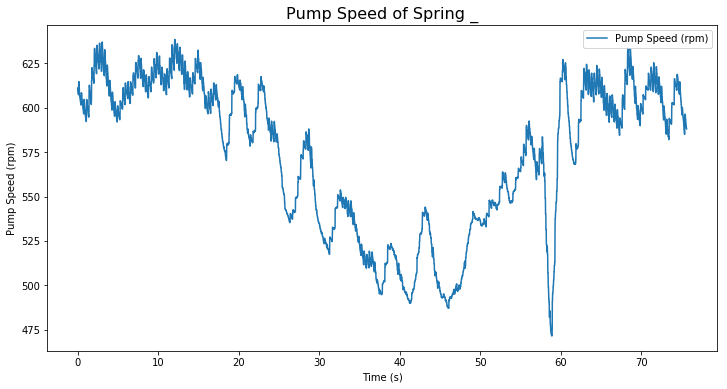

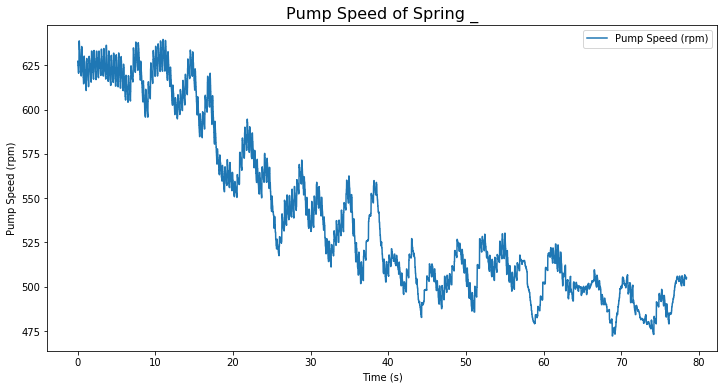

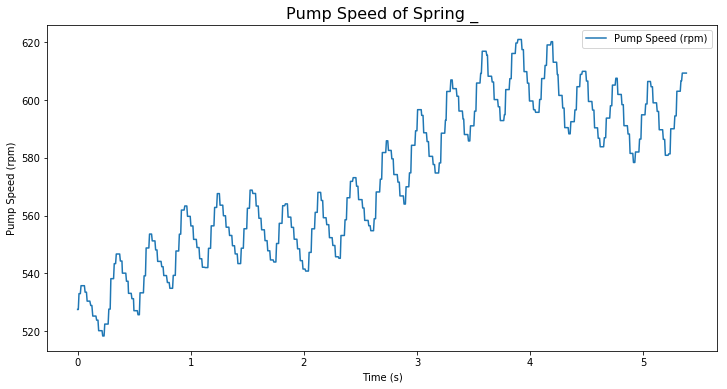

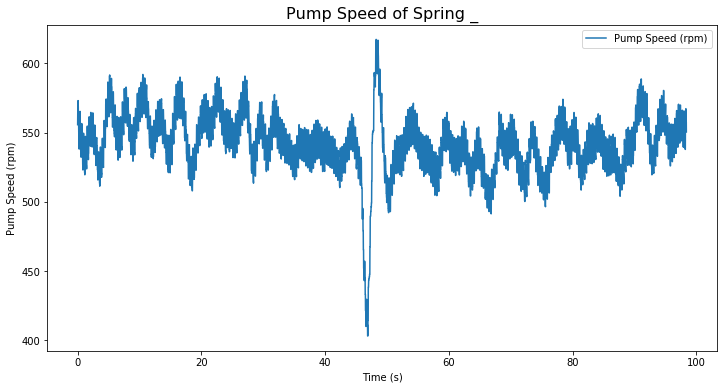

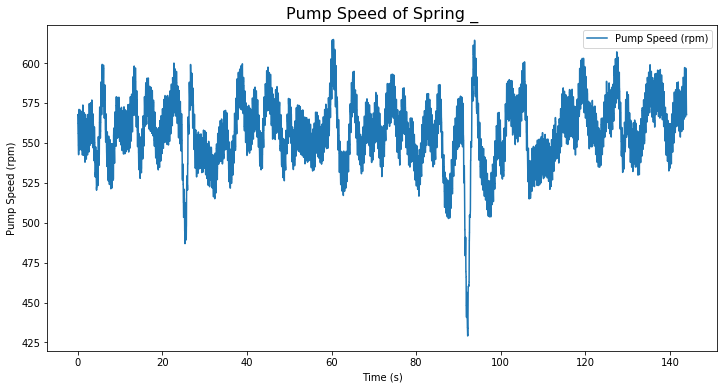

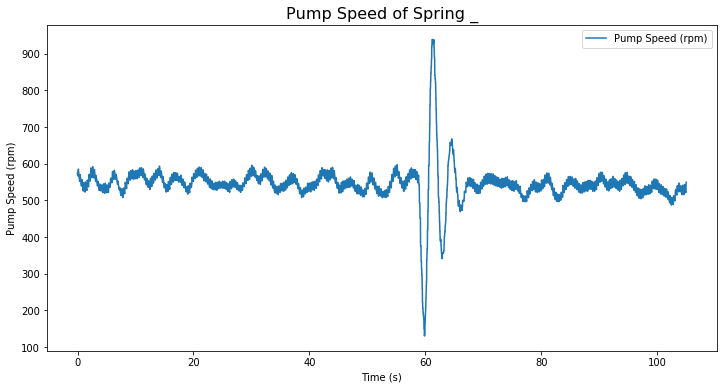

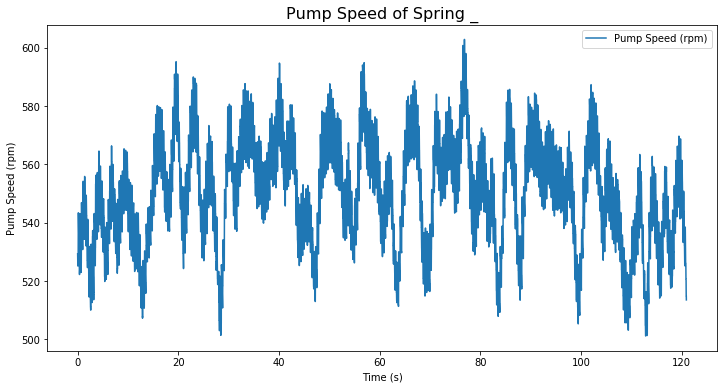

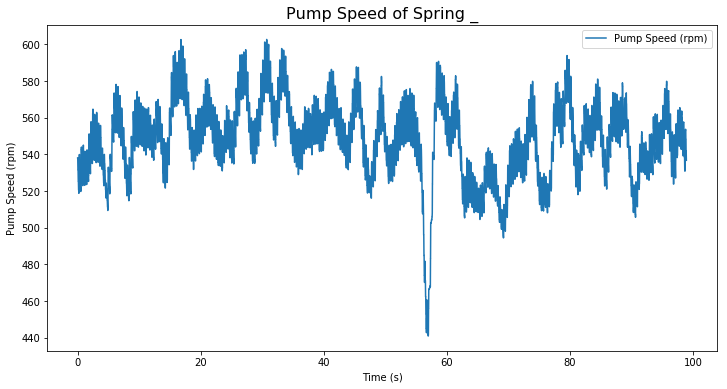

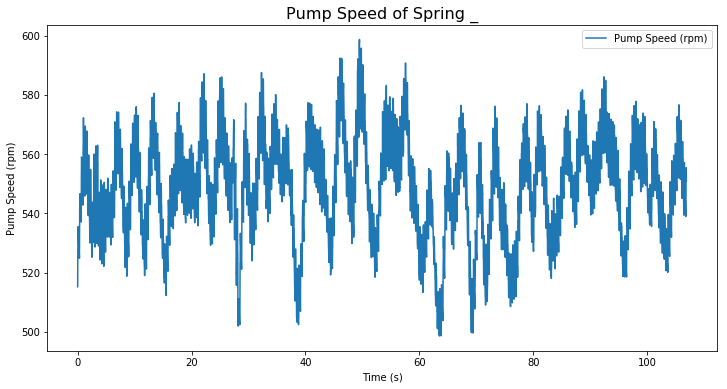

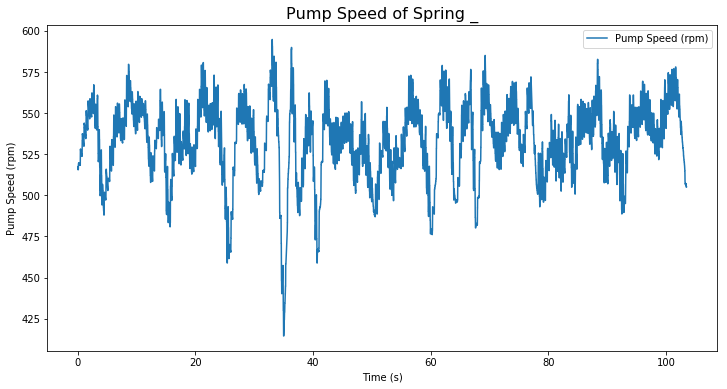

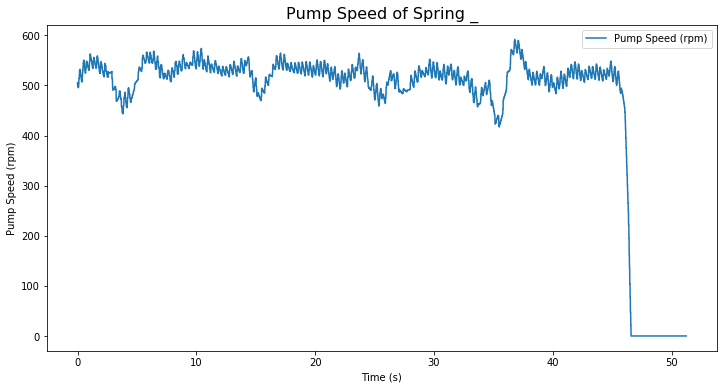

In [0]:
#figure out if theres a way to put start end index in an array
#check procoda parser documentation
flow_tot = np.array([])
rate_tot = np.array([])
dur_tot = np.array([])
for j in range (0,len(start)):
  time = (pp.column_of_time(nov23,start[j],end[j])).to(u.s)
  airchamber = -pp.column_of_data(nov23, start[j], 2, end[j], 'cm')
  pump = pp.column_of_data(nov23, start[j], 4, end[j], 'rpm')
  plt.figure(figsize=(12,6))
  #plt.plot(time,airchamber,'-', label='Air Chamber')
  plt.plot(time,pump*1200, '-', label = 'Pump Speed (rpm)')
  plt.title('Pump Speed of Spring _', fontsize=16)
  plt.xlabel('Time (s)')
  plt.ylabel('Pump Speed (rpm)')
  plt.legend()
  plt.show()
  rate = np.array([])
  deltatime = time[len(time)-1]-time[0];
  #for loop or vector calc
  for k in range(0,len(time)-1):
    rate = np.append(rate, ac.flow_rate(ac.vol_per_rev_LS(17),pump[k]*2*600))
  rate_avg =   np.average(rate)
  flow = integrate.simps(rate, x=None, dx=deltatime, axis=-1, even='avg')
  flow_tot = np.append(flow_tot,flow)
  rate_tot = np.append(rate_tot,rate_avg)
  dur_tot = np.append(dur_tot, deltatime)



In [0]:
turn = np.array(turn, dtype='int')
dur_tot = dur_tot
flow_tot = flow_tot
rate_tot = rate_tot
for m in range(0, len(dur_tot)):
  total = "After {} turn, the total flow is {} in {}, and the average flow rate is {}."
  print(total.format(turn[m], flow_tot[m], dur_tot[m], rate_tot[m]))

After 2 turn, the total flow is 25460775.21913764 in 75.60596160001012, and the average flow rate is 26.73527629615616.
After 3 turn, the total flow is 25815149.718562383 in 78.41866175999535, and the average flow rate is 25.22008030018612.
After 4 turn, the total flow is 128878.54796493935 in 5.382780480001514, and the average flow rate is 26.721643376765215.
After 5 turn, the total flow is 40742028.6229032 in 98.39831615999692, and the average flow rate is 25.287295219280363.
After 6 turn, the total flow is 89592597.88115963 in 143.9337945600027, and the average flow rate is 25.966028238686555.
After 7 turn, the total flow is 46602378.29660187 in 105.03478655999778, and the average flow rate is 25.392663764546363.
After 8 turn, the total flow is 62490316.02413895 in 120.90444480000393, and the average flow rate is 25.674617378326836.
After 9 turn, the total flow is 41700236.48172945 in 98.90979551999557, and the average flow rate is 25.587069700054034.
After 10 turn, the total flow i

[26.7352763  25.2200803  26.72164338 25.28729522 25.96602824 25.39266376
 25.67461738 25.5870697  25.59585926 24.86455792 21.91547354]


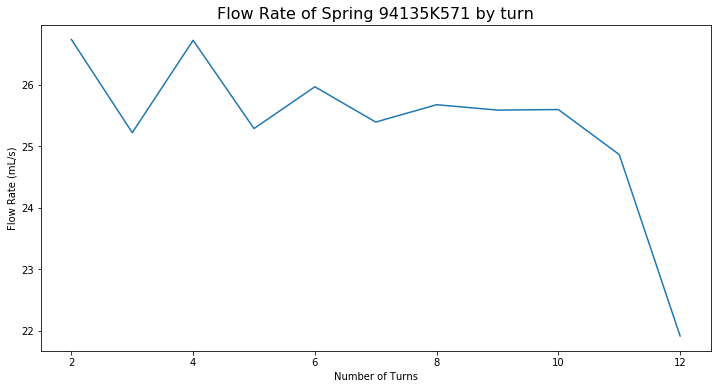

In [0]:
print(rate_tot)
plt.figure(figsize=(12,6))
plt.plot(turn,rate_tot, '-')
plt.title('Flow Rate of Spring 94135K571 by turn', fontsize=16)
plt.xlabel('Number of Turns')
plt.ylabel('Flow Rate (mL/s)')
plt.show()